<a href="https://colab.research.google.com/github/udayameister/linux/blob/main/FCandNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Functional connectivity and neural networks#

In [4]:
#Setup and Dataset#
!pip install -U nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 113.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 100.7 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import image, plotting

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [6]:
#Fixing seed for reproducibility
np.random.seed(0) 


In [7]:
#Loading data
from nilearn import datasets
num = 40
adhd_data = datasets.fetch_adhd(n_subjects=num)


Dataset created in /root/nilearn_data/adhd



 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/fbef5baff0b388a8c913a08e1d84e059/adhd40_metadata.tgz..... done.
 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0010042.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0010064.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0010128.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0021019.tgz..... done.


 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0023008.tgz..... done.


 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0023012.tgz..... done.


Downloaded 55689216 of 72402326 bytes (76.9%,    0.3s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0027011.tgz..... done.


Downloaded 51773440 of 76184603 bytes (68.0%,    0.5s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0027018.tgz..... done.


Downloaded 58048512 of 70074120 bytes (82.8%,    0.2s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0027034.tgz..... done.


Downloaded 57778176 of 69291635 bytes (83.4%,    0.2s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_0027037.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_1019436.tgz..... done.


 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_1206380.tgz..... done.


 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_1418396.tgz..... done.


Downloaded 53895168 of 62682233 bytes (86.0%,    0.2s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_1517058.tgz..... done.


 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_1552181.tgz..... done.


Downloaded 50446336 of 60663491 bytes (83.2%,    0.2s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_1562298.tgz..... done.


 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_1679142.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_2014113.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_2497695.tgz..... done.


Downloaded 56475648 of 57992968 bytes (97.4%,    0.0s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_2950754.tgz..... done.


Downloaded 34578432 of 67925261 bytes (50.9%,    1.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3007585.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3154996.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3205761.tgz..... done.


Downloaded 51363840 of 61857076 bytes (83.0%,    0.2s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3520880.tgz..... done.


Downloaded 50307072 of 59385206 bytes (84.7%,    0.2s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3624598.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3699991.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3884955.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3902469.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_3994098.tgz..... done.


 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_4016887.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_4046678.tgz..... done.


Downloaded 55951360 of 69914913 bytes (80.0%,    0.3s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_4134561.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_4164316.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_4275075.tgz..... done.


Downloaded 54378496 of 73484949 bytes (74.0%,    0.4s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_6115230.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_7774305.tgz..... done.


Downloaded 54239232 of 70396354 bytes (77.0%,    0.3s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_8409791.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_8697774.tgz..... done.


Downloaded 60014592 of 63380505 bytes (94.7%,    0.1s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_9744150.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/49718167d83b032094ad6d17e64b4e49/adhd40_9750701.tgz..... done.


In [8]:
adhd_data.keys()

dict_keys(['func', 'confounds', 'phenotypic', 'description'])

In [9]:
len(adhd_data['func'])

40

In [10]:
#Getting the functional files
func = adhd_data.func
print(func[0])

/root/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz


In [11]:
#Using nilearn's individual component analysis for group level
from nilearn import decomposition

canica = decomposition.CanICA(n_components=20, mask_strategy='background')
canica.fit(func)

CanICA(mask_strategy='background')

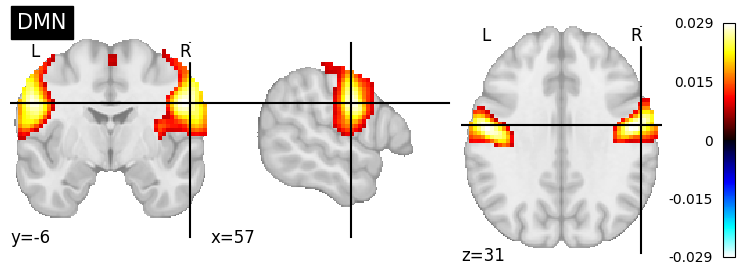

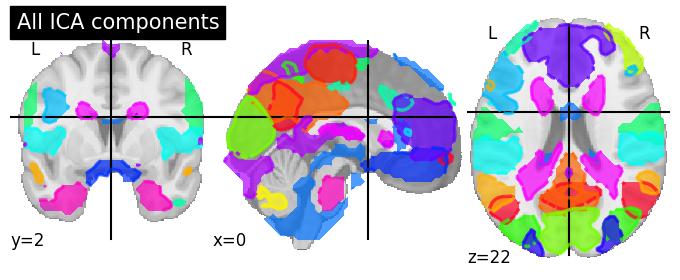

In [12]:
#Retrieving the components
components = canica.components_

#Using a masker to project into the 3D space
components_img = canica.masker_.inverse_transform(components)

#Plotting the default mode network (DMN) without region extraction
plotting.plot_stat_map(image.index_img(components_img, 9), title='DMN')
plotting.show()

#Plotting all the components
plotting.plot_prob_atlas(components_img, title='All ICA components')
plotting.show()


In [13]:
#Using a filter to extract the regions time series 
from nilearn import input_data
masker = input_data.NiftiMapsMasker(components_img, smoothing_fwhm=6,
                         standardize=False, detrend=True,
                         t_r=2.5, low_pass=0.1,
                         high_pass=0.01)



#Computing the regions signals and extracting the phenotypic information of interest
subjects = []
adhds = []
sites = []
labels = []
for func_file, confound_file, phenotypic in zip(
        adhd_data.func, adhd_data.confounds, adhd_data.phenotypic):
    time_series = masker.fit_transform(func_file, confounds=confound_file)
    subjects.append(time_series)
    is_adhd = phenotypic['adhd']
    if is_adhd == 1:
        adhds.append(time_series)    
    sites.append(phenotypic['site'])
    labels.append(phenotypic['adhd'])

In [14]:
#Comparing the three types of functional connectivity between the regions of interest
from nilearn.connectome import ConnectivityMeasure

connectivity_biomarkers = {}

kinds = ['correlation', 'partial correlation', 'tangent']
for kind in kinds:
    conn_measure = ConnectivityMeasure(kind=kind, vectorize=True)
    connectivity_biomarkers[kind] = conn_measure.fit_transform(subjects)

# For each kind, all individual coefficients are stacked in a unique 2D matrix.
print('{0} correlation biomarkers for each subject.'.format(
    connectivity_biomarkers['tangent'].shape[1]))

210 correlation biomarkers for each subject.


In [15]:
#Stratifying the data to use for comparison

from sklearn.model_selection import StratifiedKFold

classes = ['{0}{1}'.format(site_name, adhd_label)
           for site_name, adhd_label in zip(sites, labels)]
cv = StratifiedKFold(n_splits=3)

In [16]:
#Classifying using the connectivity coefficients and linear support vector
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

mean_scores = []
for kind in kinds:
    svc = LinearSVC(random_state=0)
    cv_scores = cross_val_score(svc,
                                connectivity_biomarkers[kind],
                                y=labels,
                                cv=cv,
                                groups=labels,
                                scoring='accuracy',
                                )
    mean_scores.append(cv_scores.mean())

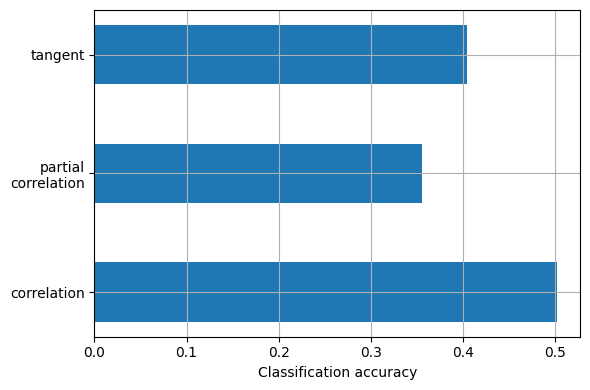

In [17]:
#Visualizing results and accuracy
from nilearn.plotting import show

plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05)
yticks = [kind.replace(' ', '\n') for kind in kinds]
plt.yticks(positions, yticks)
plt.xlabel('Classification accuracy')
plt.grid(True)
plt.tight_layout()

show()

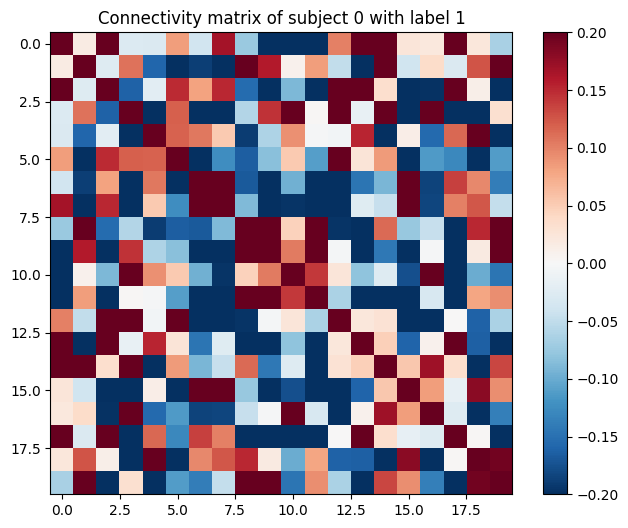

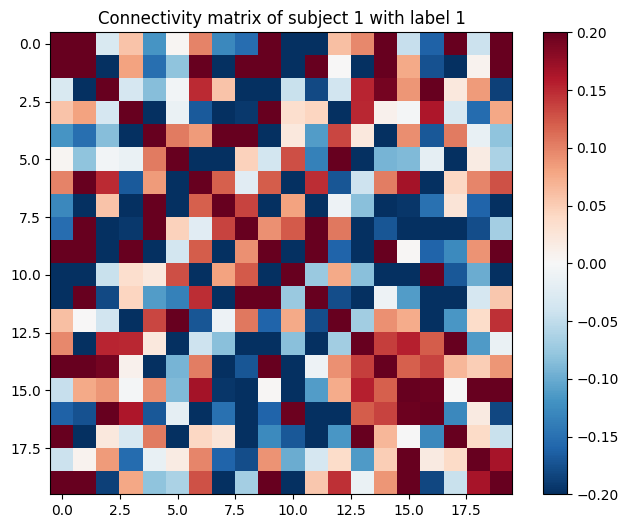

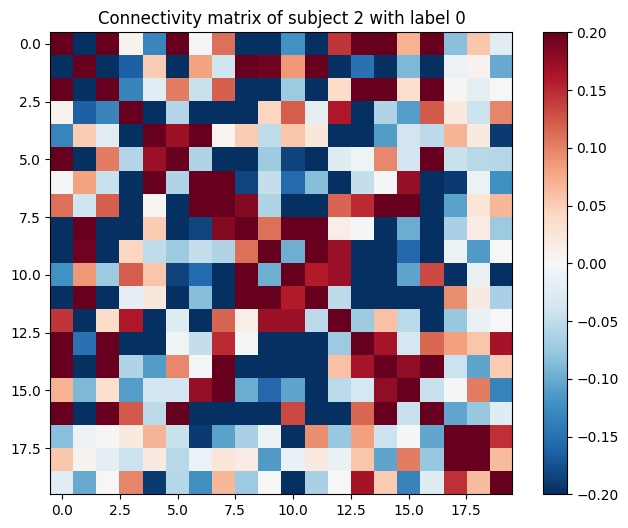

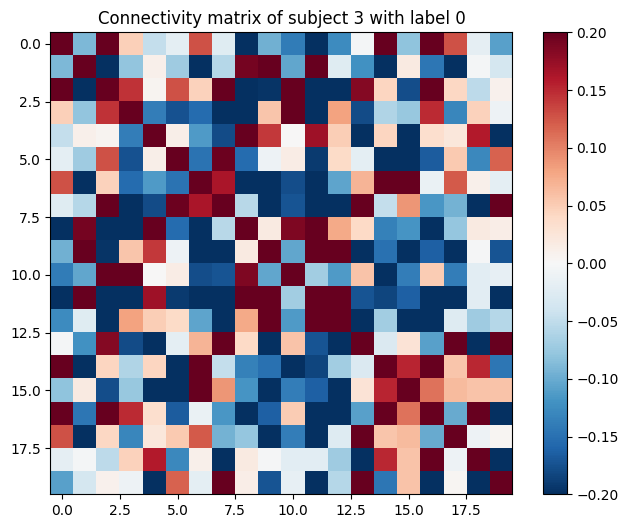

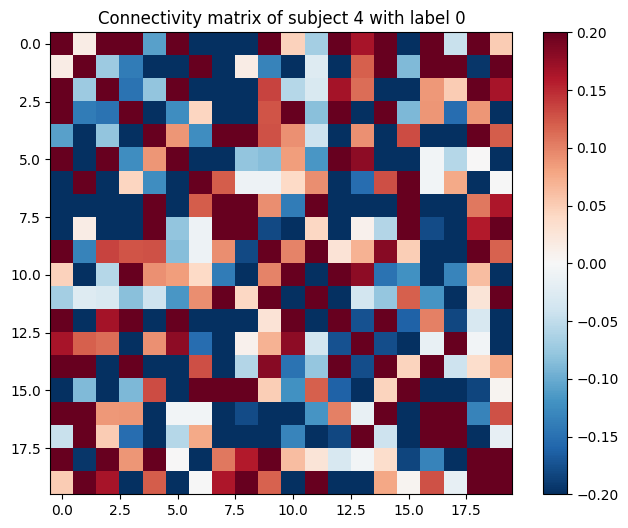

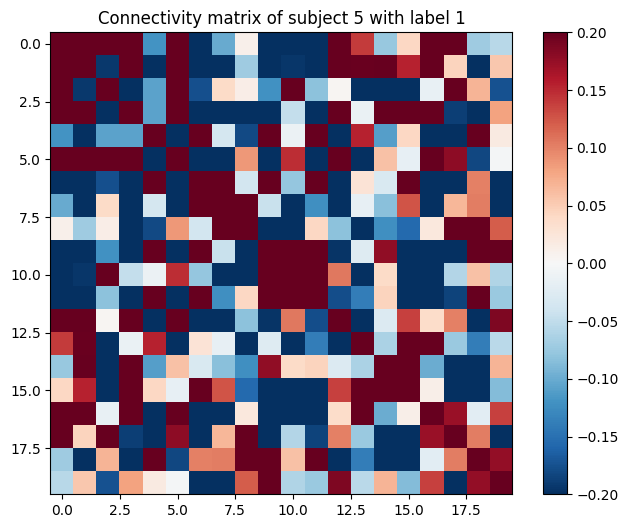

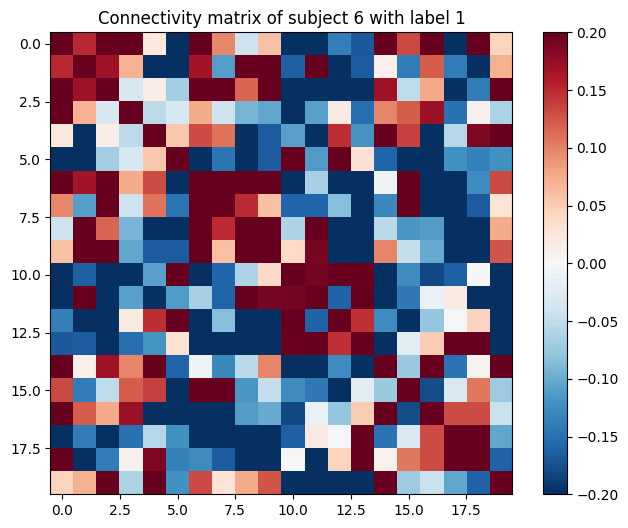

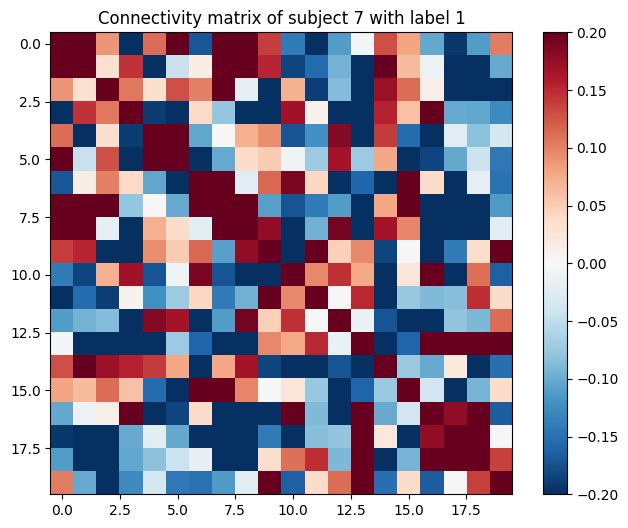

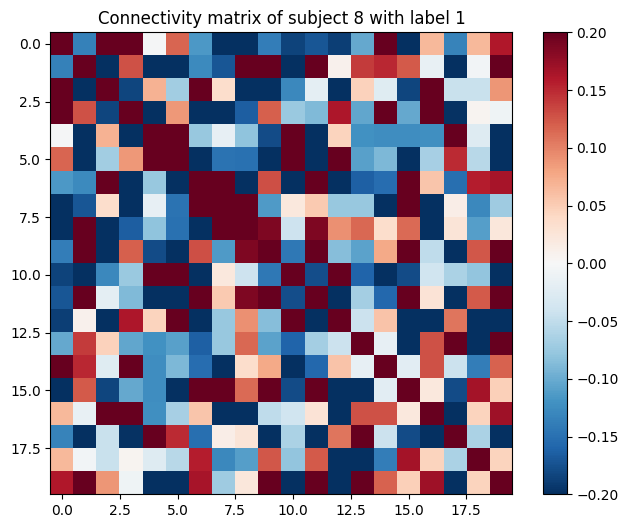

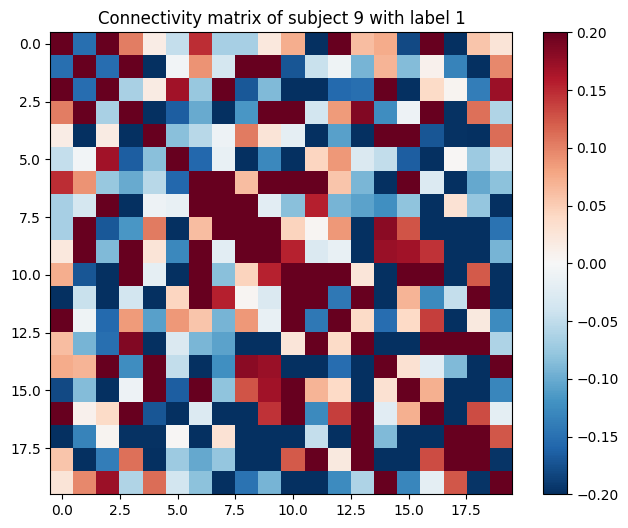

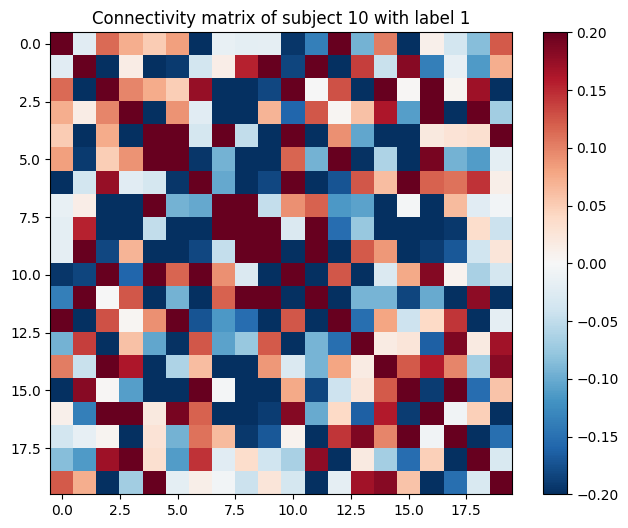

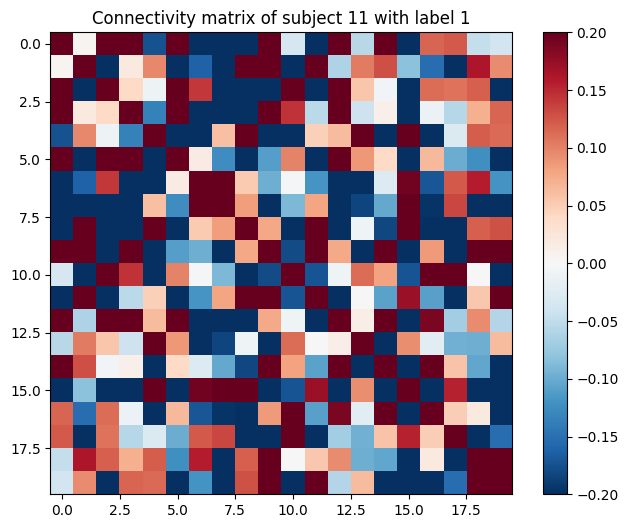

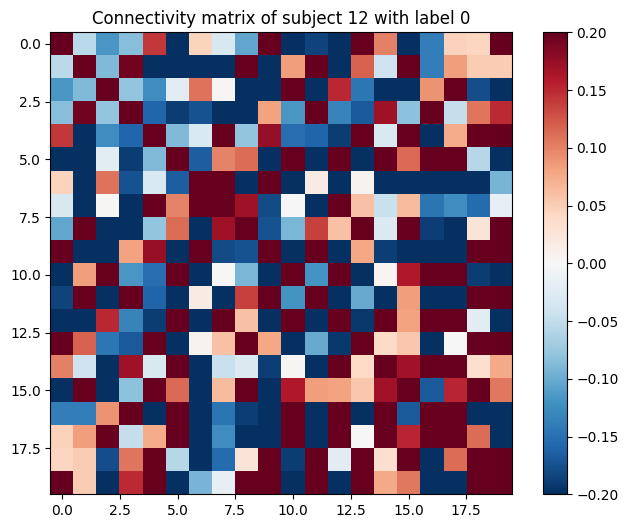

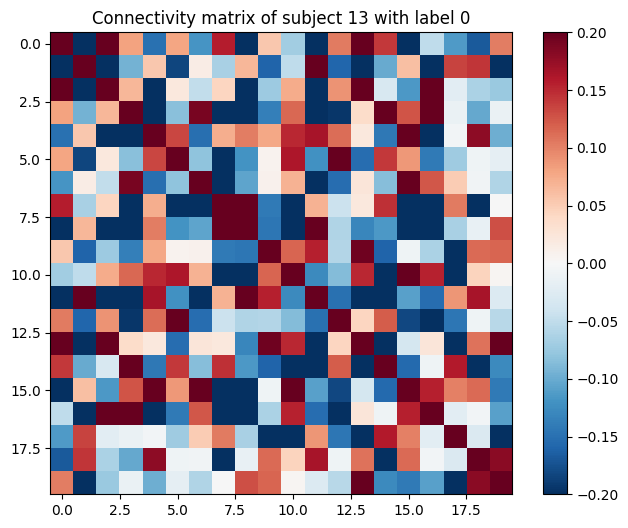

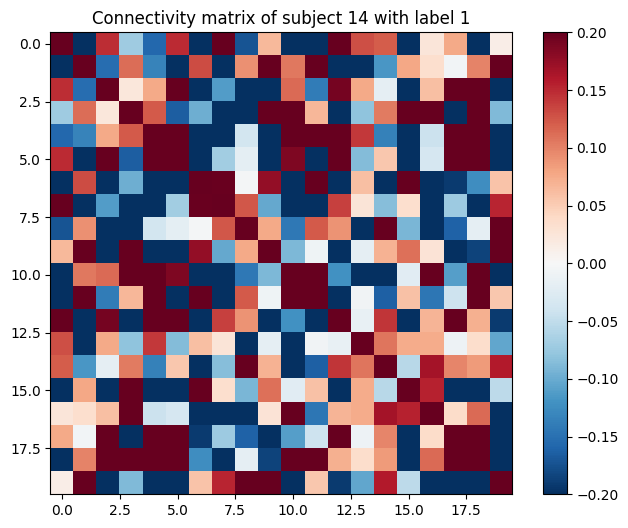

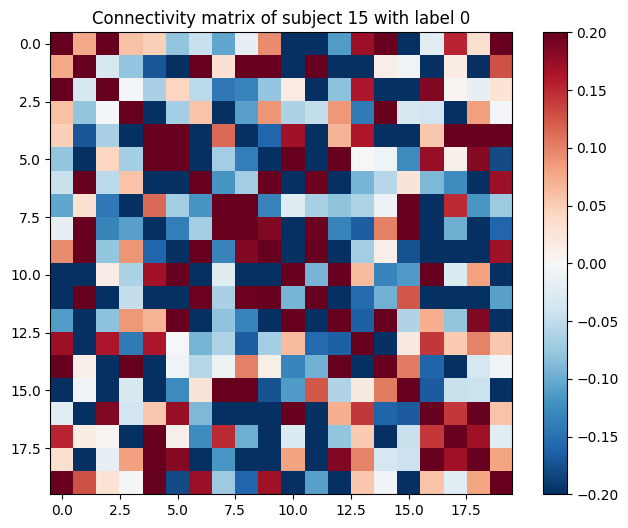

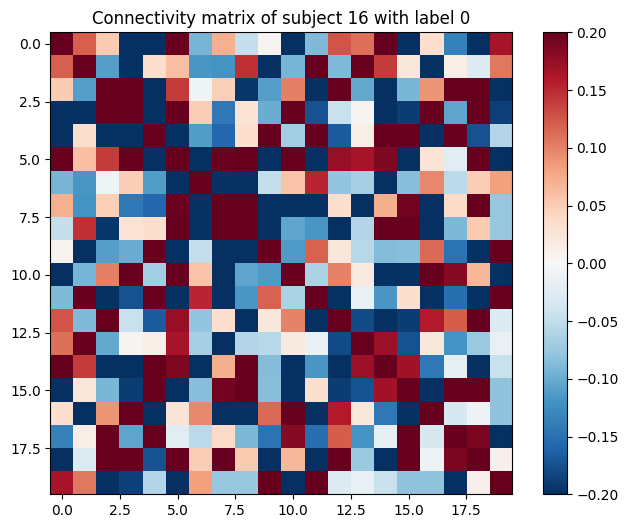

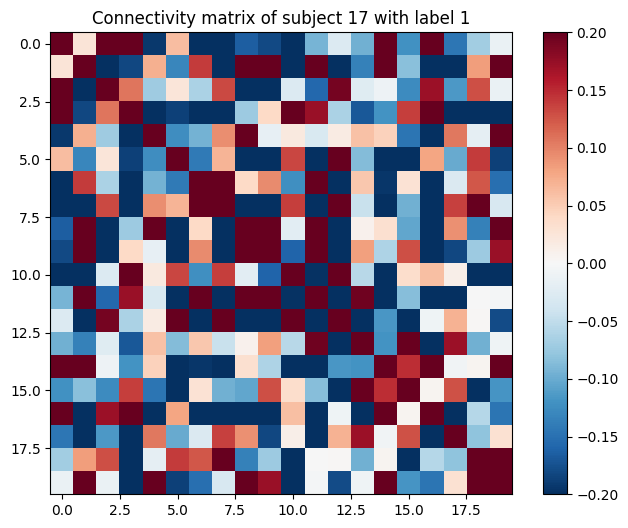

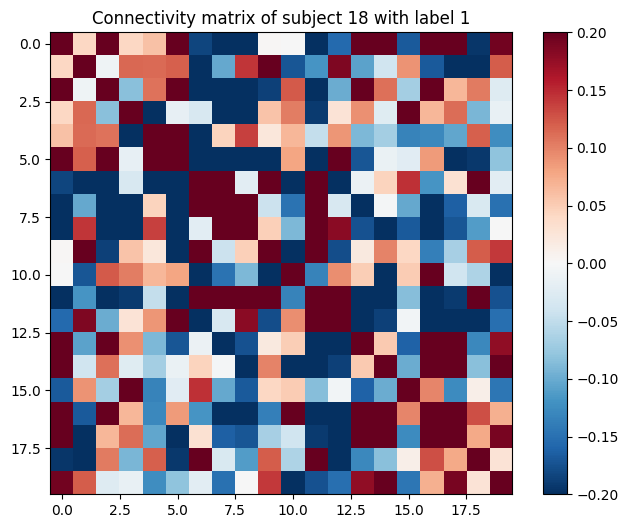

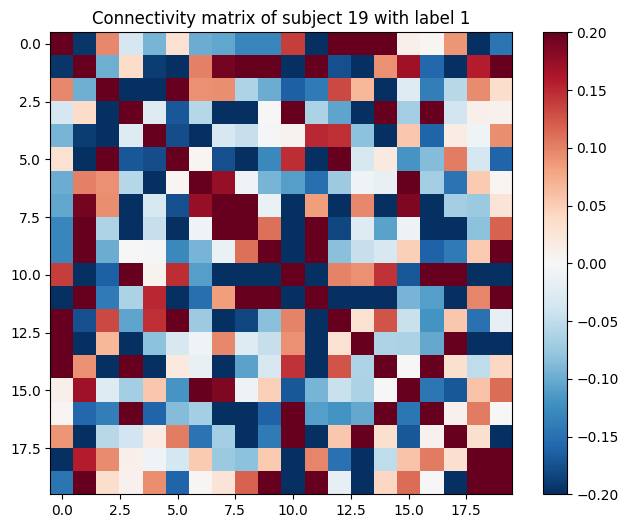

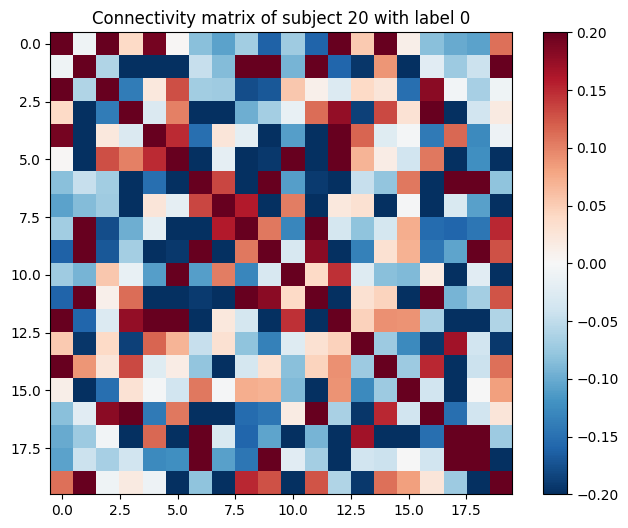

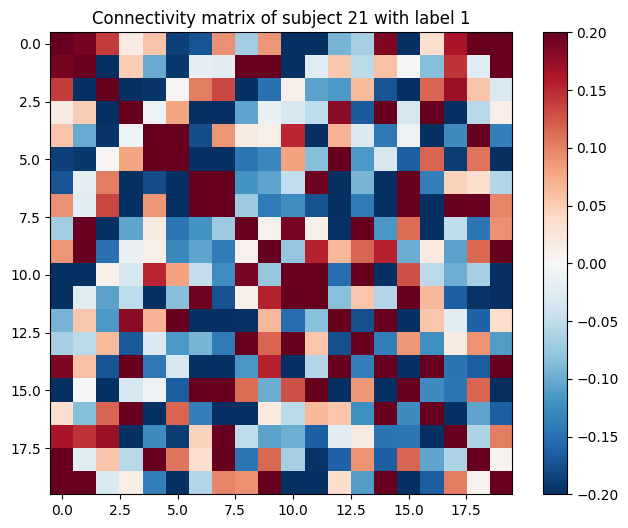

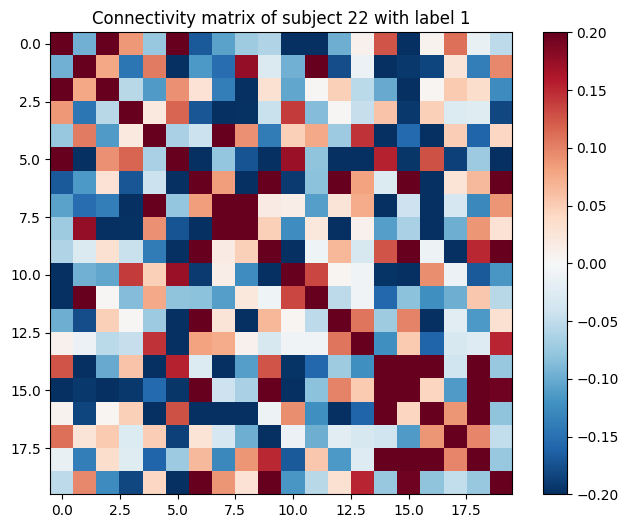

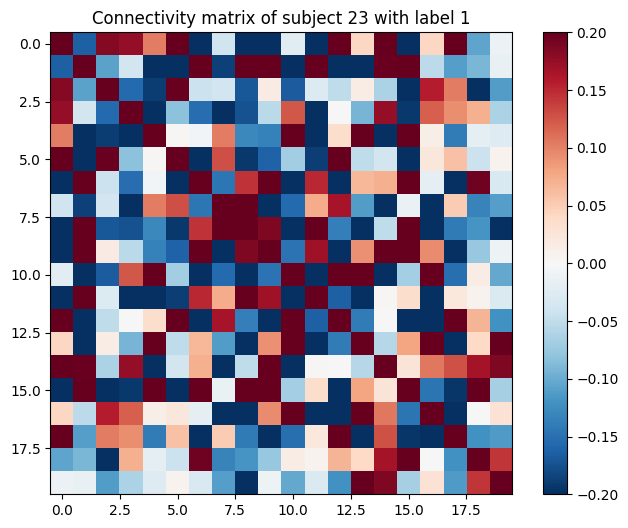

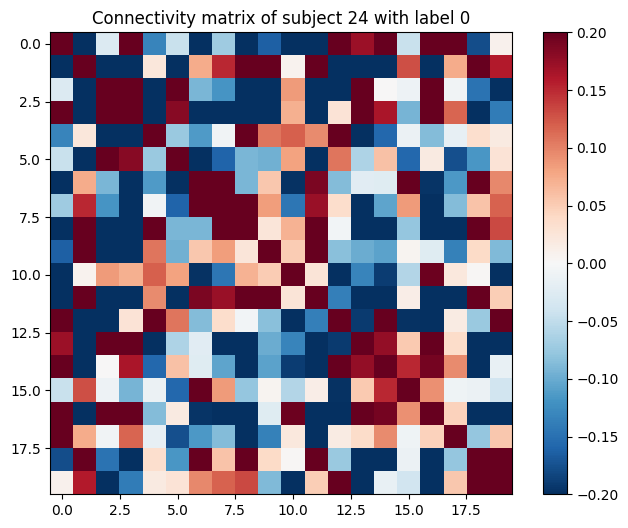

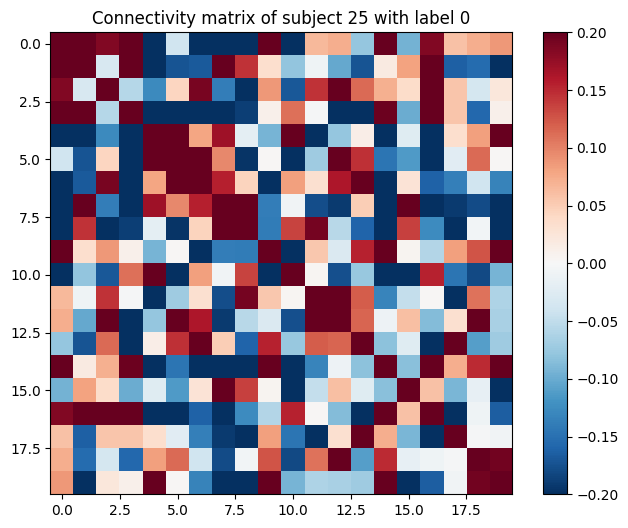

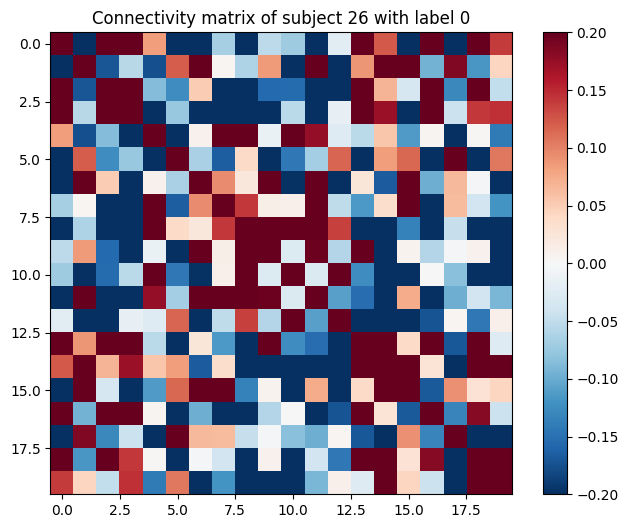

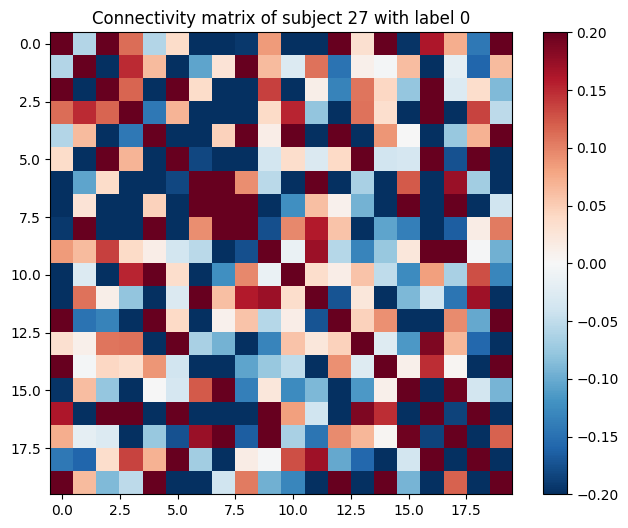

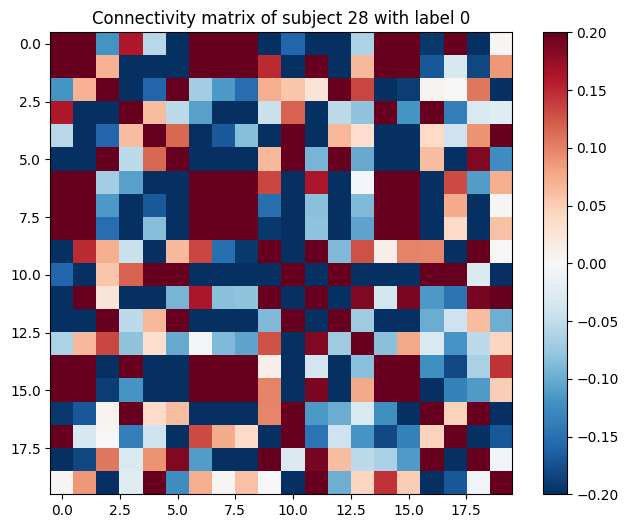

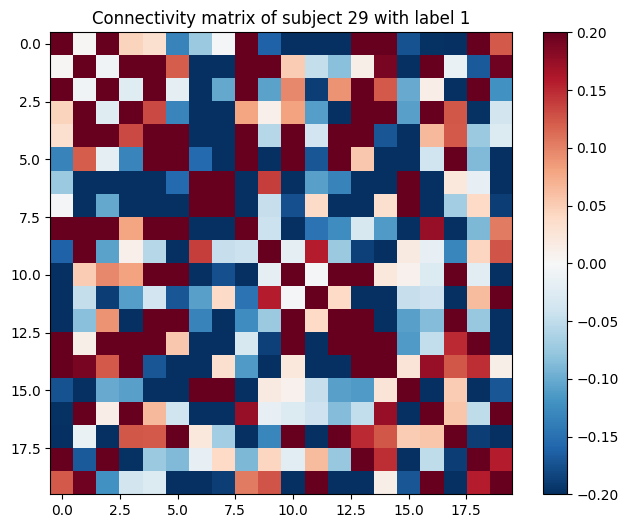

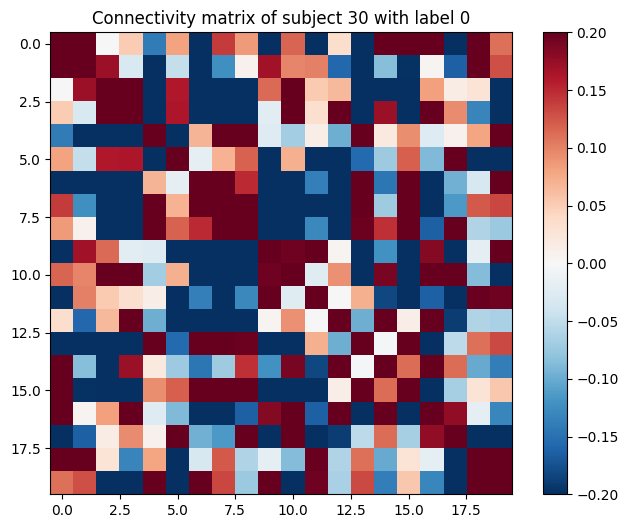

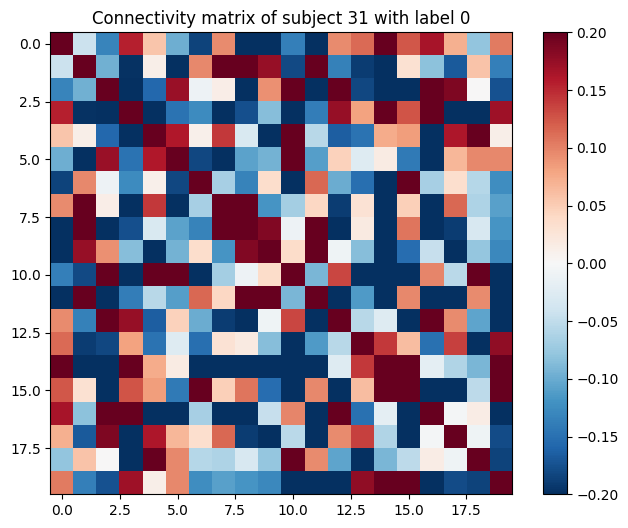

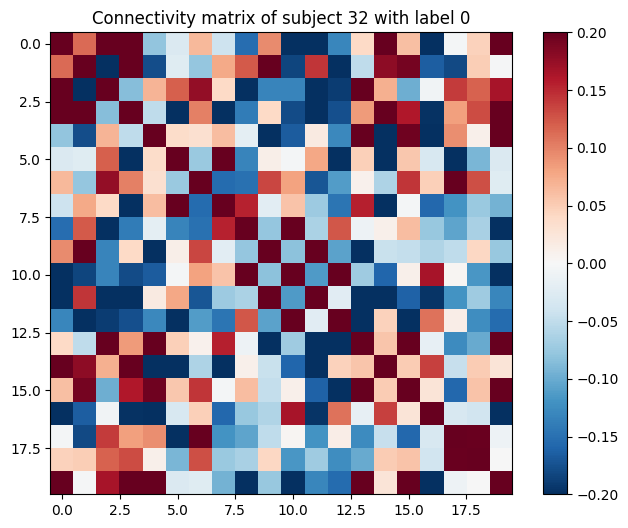

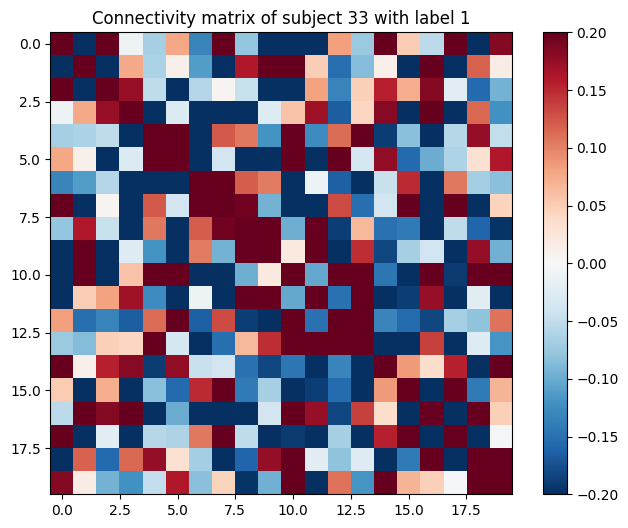

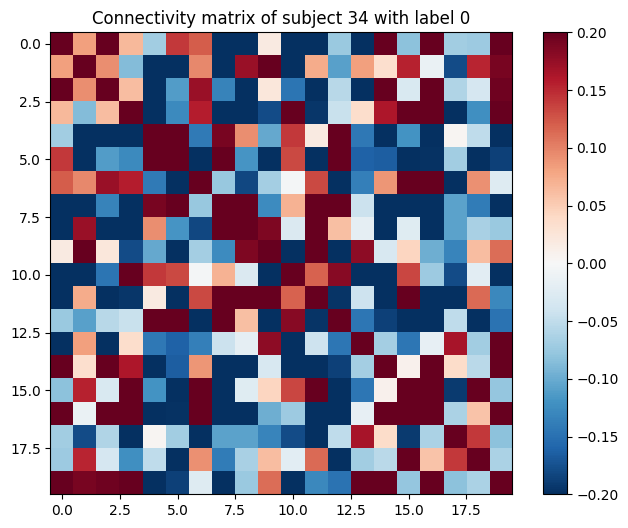

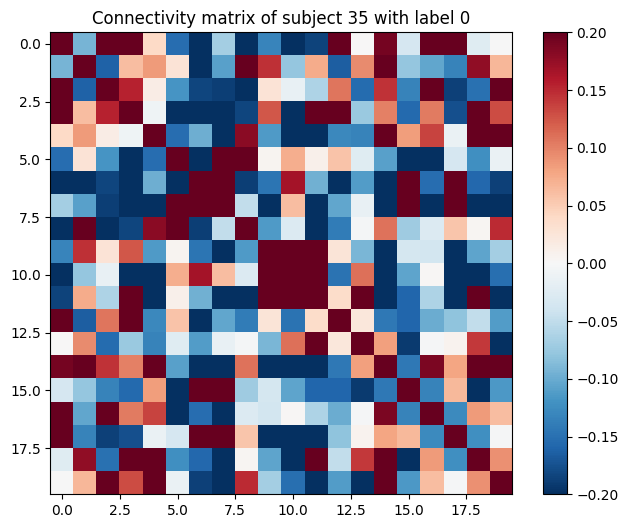

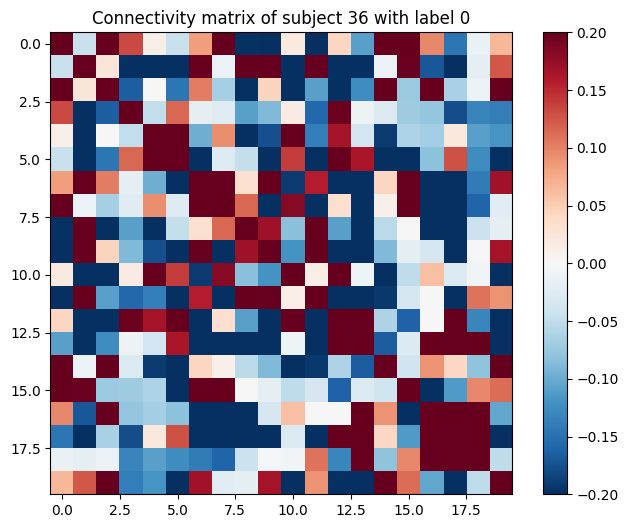

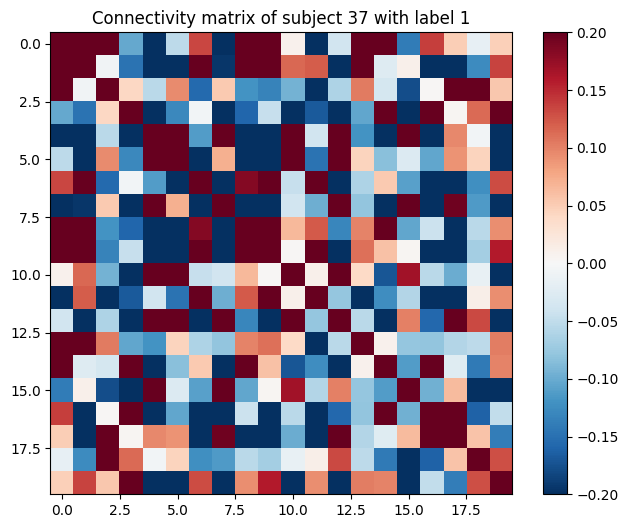

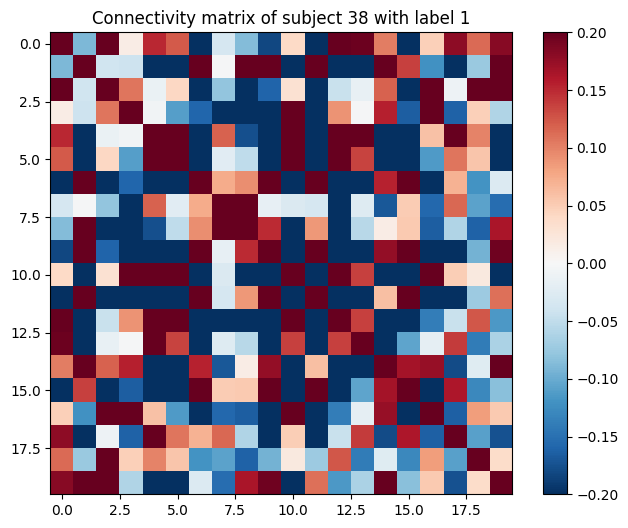

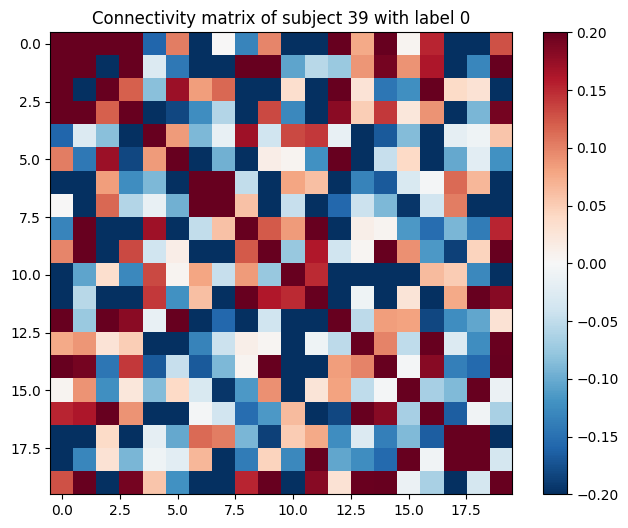

In [18]:
#Displaying the connectomes for the most accurate kind of functional connectivity
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform(subjects)


for i in range(40):
    plt.figure(figsize=(8,6))
    plt.imshow(correlation_matrices[i], vmax=.20, vmin=-.20, cmap='RdBu_r')
    plt.colorbar()
    plt.title('Connectivity matrix of subject {} with label {}'.format(i, labels[i]))

In [19]:
#Separating the correlation matrices between treatment and control subjects
adhd_correlations = []
control_correlations = []
for i in range(40):
    if labels[i] == 1:
        adhd_correlations.append(correlation_matrices[i])
    else:
        control_correlations.append(correlation_matrices[i])

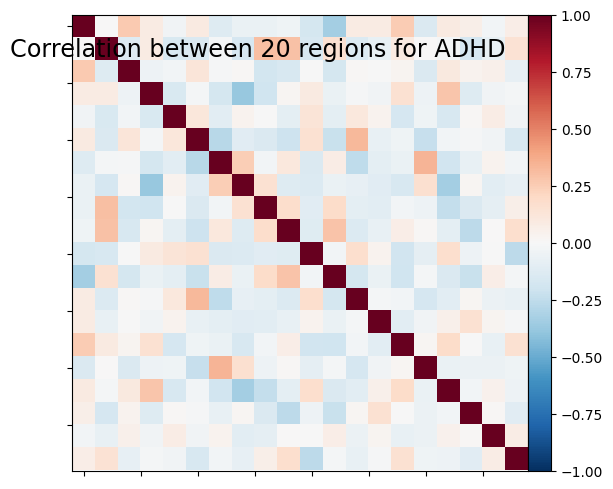

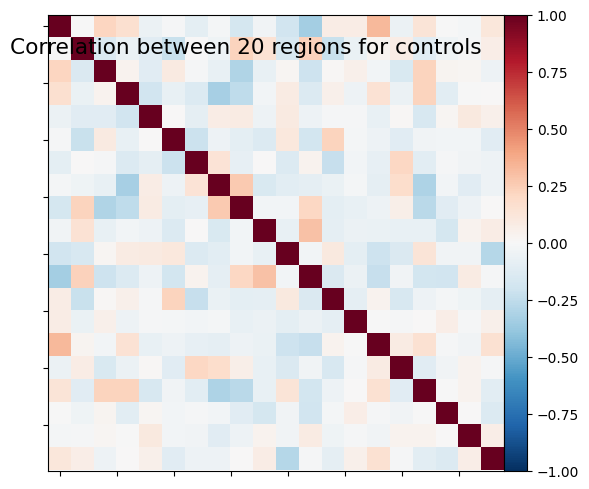

In [20]:
#Getting the mean correlation matrix across all treatment subjects
mean_correlations_adhd = np.mean(adhd_correlations, axis=0).reshape(time_series.shape[-1],
                                                          time_series.shape[-1])

#Getting the mean correlation matrix across all control subjects
mean_correlations_control = np.mean(control_correlations, axis=0).reshape(time_series.shape[-1],
                                                          time_series.shape[-1])

#Visualizing the mean correlation
plotting.plot_matrix(mean_correlations_adhd, vmax=1, vmin=-1,
                               colorbar=True, title='Correlation between 20 regions for ADHD')

plotting.plot_matrix(mean_correlations_control, vmax=1, vmin=-1,
                               colorbar=True, title='Correlation between 20 regions for controls')

#Getting the center coordinates from the component decomposition to use as atlas labels
coords = plotting.find_probabilistic_atlas_cut_coords(components_img)

In [21]:
#Creating the equivalent interactive visualization
view = plotting.view_connectome(mean_correlations_adhd, coords, edge_threshold='80%')
view


In [24]:
view = plotting.view_connectome(mean_correlations_control, coords, edge_threshold='80%')
view

In [25]:
#Splitting data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(connectivity_biomarkers['correlation'], labels, test_size=0.3)

In [26]:
#Creating the classification model
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(32, activation='tanh', kernel_initializer='random_normal', input_shape=connectivity_biomarkers['correlation'].shape[1:]))
#Second  Hidden Layer
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
#Third  Hidden Layer
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [27]:
#Compiling the model
classifier.compile(optimizer = Adam(lr =.0001),loss='binary_crossentropy', metrics =['accuracy'])

In [29]:
#Fitting the model
classifier.fit(np.array(X_train),np.array(y_train), batch_size=32, epochs=10000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 17ms/step - loss: 0.6420 - accuracy: 0.8571
Epoch 190/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.6413 - accuracy: 0.8571
Epoch 191/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.6406 - accuracy: 0.8571
Epoch 192/10000
1/1 [==============================] - 0s 12ms/step - loss: 0.6400 - accuracy: 0.8571
Epoch 193/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.6393 - accuracy: 0.8571
Epoch 194/10000
1/1 [==============================] - 0s 27ms/step - loss: 0.6386 - accuracy: 0.8571
Epoch 195/10000
1/1 [==============================] - 0s 26ms/step - loss: 0.6379 - accuracy: 0.8571
Epoch 196/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.6372 - accuracy: 0.8571
Epoch 197/10000
1/1 [==============================] - 0s 21ms/step - loss: 0.6365 - accuracy: 0.8571
Epoch 198/10000
1/1 [============================

KeyboardInterrupt: ignored

In [30]:
#Fitting the model
classifier.fit(np.array(X_train),np.array(y_train), batch_size=32, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 19ms/step - loss: 8.8356e-04 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 8.8244e-04 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 8.8131e-04 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 8.8020e-04 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7908e-04 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7797e-04 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 8.7685e-04 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.7574e-04 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.7463e-04 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.7353e-04 

In [31]:
#Fitting the model
classifier.fit(np.array(X_train),np.array(y_train), batch_size=32, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 27ms/step - loss: 7.8009e-04 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 7.7914e-04 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 7.7819e-04 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 7.7724e-04 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 7.7630e-04 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 7.7535e-04 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 7.7441e-04 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 7.7346e-04 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.7252e-04 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.7158e-04 

In [32]:
#Determining accuracy on training
eval_model=classifier.evaluate(np.array(X_train), np.array(y_train))
eval_model

1/1 [==============================] - 0s 120ms/step - loss: 6.9201e-04 - accuracy: 1.0000


[0.0006920088781043887, 1.0]

In [33]:
#Making the classification and determining accuracy
y_pred=classifier.predict(X_test,batch_size=32)
y_pred =(y_pred>0.5)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

1/1 [==============================] - 0s 149ms/step
[[3 4]
 [1 4]]
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.50      0.80      0.62         5

    accuracy                           0.58        12
   macro avg       0.62      0.61      0.58        12
weighted avg       0.65      0.58      0.57        12

